In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


from src.trump_strategy.nn.trump_data_generator import TrumpDataGenerator

In [21]:
data_gen = TrumpDataGenerator(
    n_play_per_hand=100,
)

In [24]:
# deck, results = next(data_gen)

HANDS_TO_SIMULATE = 10

decks = np.zeros((HANDS_TO_SIMULATE, 36))
results = np.zeros((HANDS_TO_SIMULATE, 6, 100))

for i in tqdm(range(HANDS_TO_SIMULATE)):
    deck, result = next(data_gen)
    decks[i] = deck
    results[i] = result

100%|██████████| 10/10 [00:04<00:00,  2.46it/s]


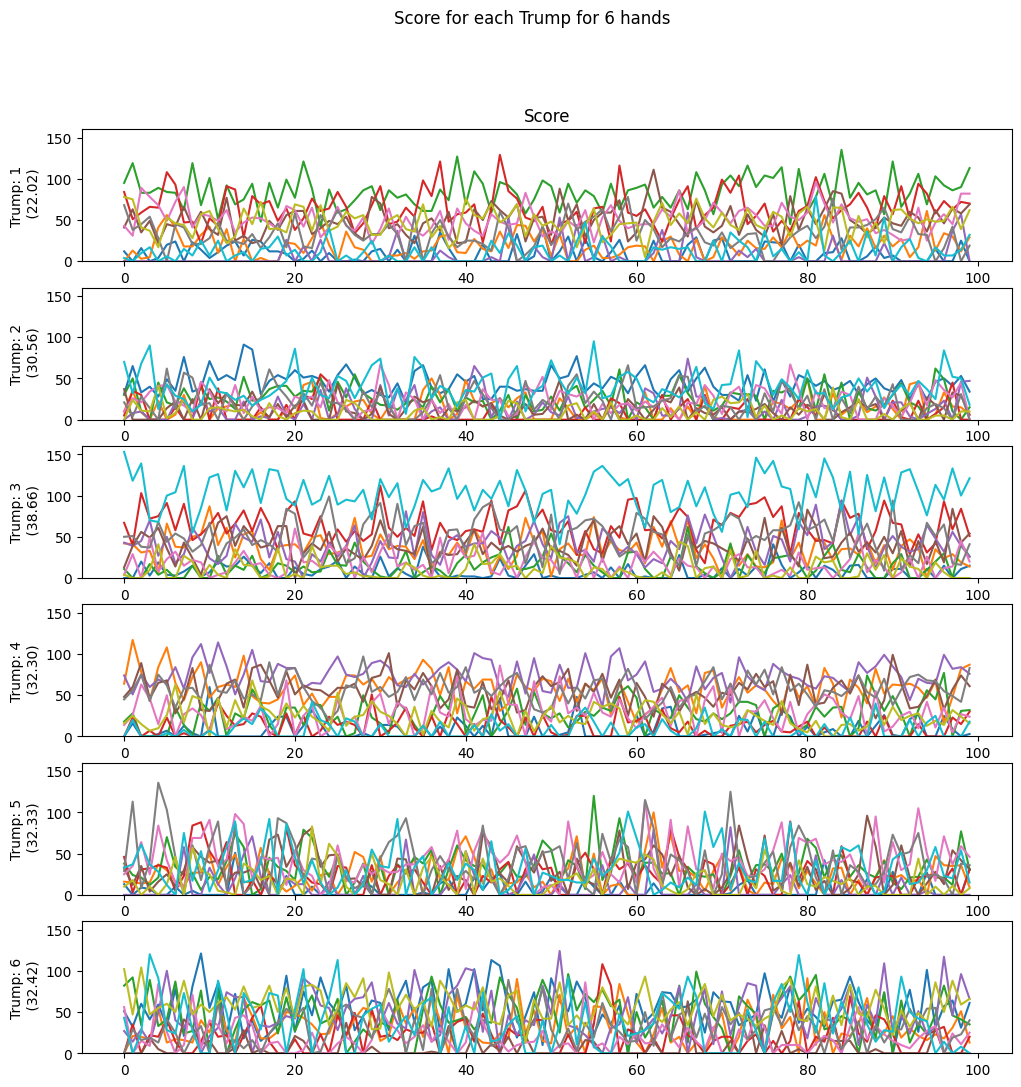

In [29]:
fig, ax = plt.subplots(6, 1, figsize=(12, 12))

# title
fig.suptitle(f"Score for each Trump for {results.shape[1]} hands")
ax[0].set_title("Score")


for i in range(6):
    for j in range(results.shape[0]):
        ax[i].plot(results[j, i, :])

    # set y scale to be the same for all subplots
    ax[i].set_ylim([0, 160])
    ax[i].set_ylabel(f"Trump: {i+1}\n ({np.mean(results[i, :]):.2f})")

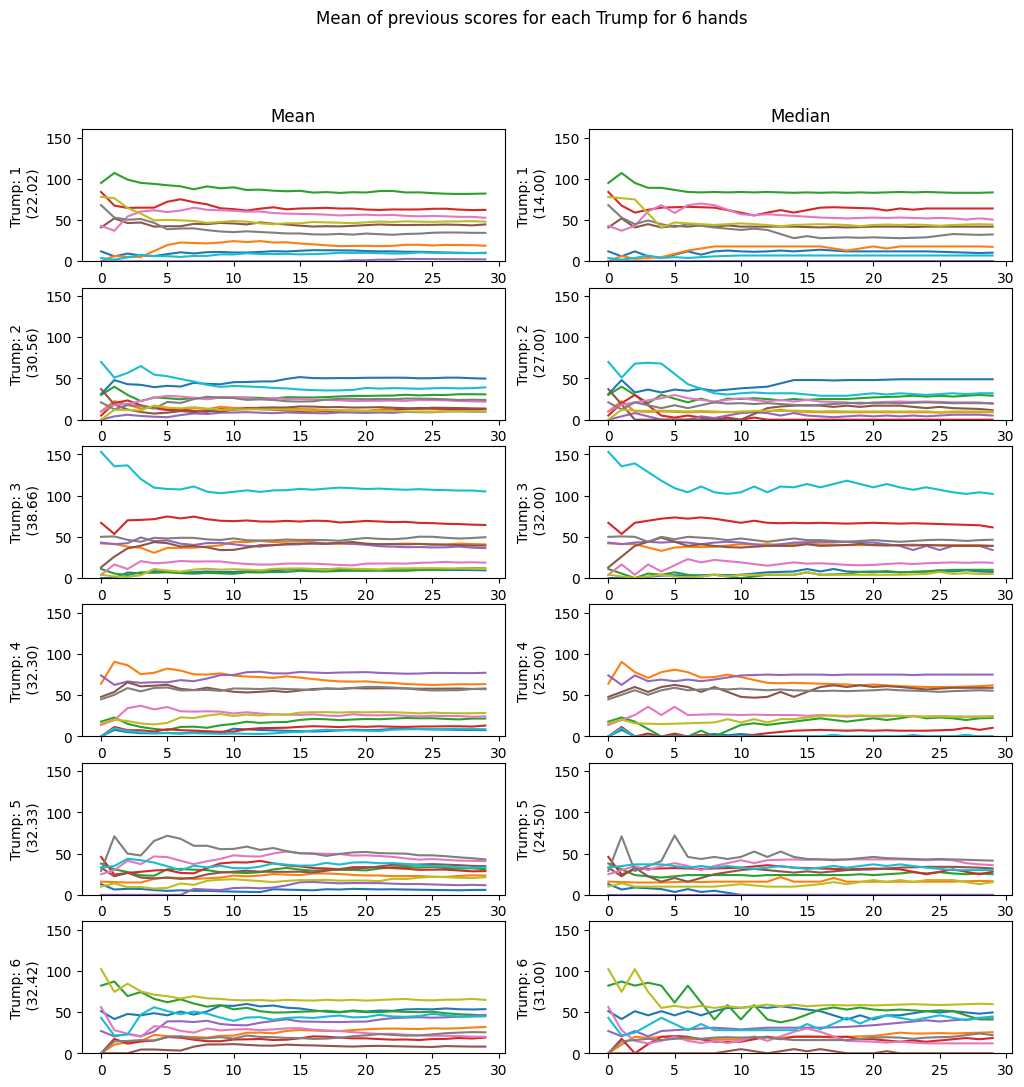

In [36]:
PLOT_LEN = 30

fig, ax = plt.subplots(6, 2, figsize=(12, 12))

results_mean = np.zeros((HANDS_TO_SIMULATE, 6, PLOT_LEN))
results_median = np.zeros((HANDS_TO_SIMULATE, 6, PLOT_LEN))
for i in range(6):
    for j in range(PLOT_LEN):
        for k in range(results.shape[0]):
            results_mean[k, i, j] = np.mean(results[k, i, : j + 1])
            results_median[k, i, j] = np.median(results[k, i, : j + 1])

# title
fig.suptitle(f"Mean of previous scores for each Trump for {results.shape[1]} hands")

ax[0, 0].set_title("Mean")
ax[0, 1].set_title("Median")

for i in range(6):
    for j in range(results.shape[0]):
        ax[i, 0].plot(results_mean[j, i, :])
    ax[i, 0].set_ylim([0, 160])
    ax[i, 0].set_ylabel(f"Trump: {i+1}\n ({np.mean(results[i, :]):.2f})")
    for j in range(results.shape[0]):
        ax[i, 1].plot(results_median[j, i, :])
    ax[i, 1].set_ylim([0, 160])
    ax[i, 1].set_ylabel(f"Trump: {i+1}\n ({np.median(results[i, :]):.2f})")

In [5]:
# HANDS_TO_SIMULATE = 100
#
# results = np.zeros((HANDS_TO_SIMULATE, 6, 100))
# decks = np.zeros((HANDS_TO_SIMULATE, 36))
# for i in tqdm(range(HANDS_TO_SIMULATE)):
#     deck, result = next(data_gen)
#     results[i] = result

In [6]:
# calulate the median of every score range
# results_median = np.zeros_like(results)
# for i in range(results.shape[1]):
#     for j in range(results.shape[2]):
#         results_median[:, i, j] = np.median(results[:, i, :j+1], axis=1)
#
# results_mean = np.zeros_like(results)
# for i in range(results.shape[1]):
#     for j in range(results.shape[2]):
#         results_mean[:, i, j] = np.mean(results[:, i, :j+1], axis=1)